# Assignment A1 [35 marks]



The assignment consists of 4 exercises. Each exercise may contain coding and/or discussion questions.
- Type your **code** in the **code cells** provided below each question.
- For **discussion** questions, use the **Markdown cells** provided below each question, indicated by 📝. Double-click these cells to edit them, and run them to display your Markdown-formatted text. Please refer to the Week 1 tutorial notebook for Markdown syntax.

---
## Question 1: Numerical Linear Algebra [8 marks]

**1.1** Using the method of your choice, solve the linear system $Ax = b$ with

$$ A = \begin{pmatrix}
          1 &  1 & 0 & 1  \\ 
         -1 &  0 & 1 & 1  \\ 
          0 & -1 & 0 & -1  \\ 
          1 & 0 & 1 & 0 
        \end{pmatrix}
        \qquad \text{and} \qquad 
    b = \begin{pmatrix}
           5.2 \cr 0.1 \cr 1.9 \cr 0
        \end{pmatrix},
$$

and compute the residual norm $r = \|Ax-b\|_2$. Display the value of $r$ in a clear and easily readable manner.

**[2 marks]**

In [4]:
import numpy as np 
from numpy import linalg


A = np.array([[1, 1, 0, 1],[-1, 0, 1, 1],[0, -1, 0, -1],[1, 0, 1, 0]])
b = np.array([5.2, 0.1, 1.9, 0])

x= np.linalg.solve(A, b)
print(x)

r = np.linalg.norm([x])
print(r)



[  7.1 -16.2  -7.1  14.3]
23.827505114887707


**1.2** Repeat the same calculations for the matrix

$$ A = \begin{pmatrix}
          a &  1 & 0 & 1  \\ 
         -1 &  0 & 1 & 1  \\ 
          0 & -1 & 0 & -1  \\ 
          1 & 0 & 1 & 0 
        \end{pmatrix}
        \qquad \text{with} \qquad a \in \{10^{-8}, 10^{-10}, 10^{-12}\}. 
$$

Display the value of $r$ for each value of $a$, and avoid repeating (copy+pasting) code.


**[3 marks]**

In [15]:
import numpy as np 
from numpy import linalg



for i in range(len(s)):
    s = [10**-8, 10**-10, 10**-12]
    a = s[i]
    
    A = np.array([[a, 1, 0, 1],[-1, 0, 1, 1],[0, -1, 0, -1],[1, 0, 1, 0]])
    b = np.array([5.2, 0.1, 1.9, 0])

    
    x= np.linalg.solve(A, b)
    print(x)

    r = np.linalg.norm([x])
    print(r)



[ 7.10000004e+08 -1.42000001e+09 -7.10000004e+08  1.42000001e+09]
2245217153.692948
[ 7.09999941e+10 -1.41999988e+11 -7.09999941e+10  1.41999988e+11]
224521695296.27478
[ 7.09936886e+12 -1.41987377e+13 -7.09936886e+12  1.41987377e+13]
22450175553516.46


**1.3** Summarise and explain your observations in a discussion of no more than $250$ words.

**[3 marks]**

📝 ***Discussion for question 1.3***




In 1.1, we solve Ax=b, for a four-dimensional vector x, so we can calculate the residual norm, the residual norm calculates
the distance of the vector from the origin to the point, (7.1 -16.2  -7.1  14.3). So overall we have the
distance of the vector, calculated in a similar manner to finding the hypotenuse using the Pythagorean theorem.

for 1.2, we find that iteratively inserting very small values into A[0,0] and solving Ax = b for x, results in vectors 
with extremely large values, and therefore a residual norm of large magnitude/distance. This phenomena where small changes
in the entries of a matrix that produce large changes in the solution to Ax = b is called an "ill-conditioned" matrix  (1).

Small changes in even one choice of a value in A, which is multiple orders of magnitude smaller than the rest of the matrix
entries, results in vector solutions with extremely large values which are multiple orders of magnitude larger than 
what is found in the results of 1.1. If we take this "a" value to be $10^{-8}$, we find upon comparing the residual norm of 
1.1 with the residual norm of 1.2, that it is 8 orders of magnitude larger, similarly with $10^{-10}$, $10^{-12}$ 
they are ten and twelve orders of magnitude larger than the previous residual norm.

(1) - David Poole, Linear Algebra, p561

---
## Question 2: Sums [10 marks]

Consider the sum

$$
S_N = \sum_{n=1}^N \frac{2n+1}{n^2(n+1)^2}.
$$

**2.1** Write a function `sum_S()` which takes 2 input arguments, a positive integer `N` and a string `direction`, and computes the sum $S_N$ **iteratively** (i.e. using a loop):
- in the direction of increasing $n$ if `direction` is `'up'`,
- in the direction of decreasing $n$ if `direction` is `'down'`.

For instance, to calculate $S_{10}$ in the direction of decreasing $n$, you would call your function using `sum_S(10, 'down')`.

**[3 marks]**

In [2]:
def sum_S(N, direction):


    if direction == 'up':
        series = 0
        #loop from 1 to N
        for k in range(1, N + 1): 
            series += (2*k + 1)/(k**2*(k+1)**2)
        return series 
    
    elif direction == 'down':
        series = 0
        #loop from N to 1 
        for k in range(N, 0, -1):
            series += (2*k + 1)/(k**2*(k+1)**2)
        return series
    else: 
        print('Choose \'up\' or \'down\' for direction.')


print(sum_S(10, 'down'))
print(sum_S(10, 'up'))

0.9917355371900827
0.9917355371900827


**2.2** The sum $S_N$ has the closed-form expression $S_N = 1-\frac{1}{(N+1)^2}$. We assume that we can compute $S_N$ using this expression without significant loss of precision, i.e. that we can use this expression to obtain a "ground truth" value for $S_N$.

Using your function `sum_S()`, compute $S_N$ iteratively in both directions, for 10 different values of $N$, linearly spaced, between $10^3$ and $10^6$ (inclusive).

For each value of $N$, compare the results in each direction with the closed-form expression. Present your results graphically, in a clear and understandable manner.

**[4 marks]**

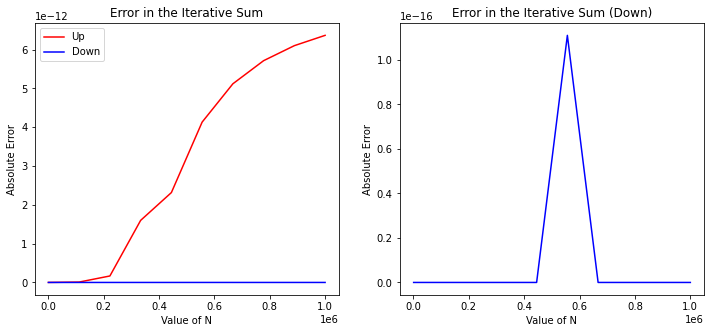

In [3]:
import numpy as np
import matplotlib.pyplot as plt

a, b = 10**3, 10**6
N_vals = np.linspace(a, b, 10, dtype = int)
err_up, err_down = [], []

for i in range(len(N_vals)):
    S_N = 1 - 1/(N_vals[i] + 1)**2
    sum_up = sum_S(N_vals[i], 'up')
    sum_down = sum_S(N_vals[i], 'down')
    err_up.append(np.abs(S_N - sum_up))
    err_down.append(np.abs(S_N - sum_down))
    

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(N_vals, err_up, 'r', label='Up')
ax[0].plot(N_vals, err_down, 'b', label='Down')
ax[1].plot(N_vals, err_down, 'b')

ax[0].legend()

ax[0].set(title='Error in the Iterative Sum',
               xlabel='Value of N',
               ylabel='Absolute Error')
ax[1].set(title='Error in the Iterative Sum (Down)',
               xlabel='Value of N',
               ylabel='Absolute Error')

plt.show()


**2.3** Describe and explain your findings in no more that $250$ words. Which direction of summation provides the more accurate result? Why?

**[3 marks]**

In terms of error of the iterative sum, summation in the downward dicrection will provide a more accurate result,
from the error graph in 2.2 comparing up with down, the absolute error gradually increases for increasing linearley spaced 
values between $10^3$ and $10^6$ (inclusive). 
For the downward itterative sum, we need to make observations at much smaller orders of magnitude to observe absolue error. 

📝 ***Discussion for question 2.3***




---
## Question 3: Numerical Integration [10 marks]

For integer $k \neq 0$ consider the integral 

$$
I(k) = \int_0^{2\pi}  x^4 \cos{k x} \ dx = \frac{32\pi^3}{k^2} - \frac{48\pi}{k^4} \ .
$$

**3.1** Write a function `simpson_I()` which takes 2 input arguments, `k` and `N`, and implements Simpson's rule to compute and return an approximation of $I(k)$, partitioning the interval $[0, 2\pi]$ into $N$ sub-intervals of equal width.

**[2 marks]**

**3.2** For $k = 1$, and for $\varepsilon \in \{10^{-n} \ |\  n \in \mathbb{N}, 3 \leqslant n \leqslant 8\}$, determine the number $N_{\text{min}}$ of partitions needed to get the value of the integral $I(1)$ correctly to within $\varepsilon$. 

**[2 marks]**

**3.3** Repeat your calculations from **3.2** for $k \in \{2^{n}\ |\ n \in \mathbb{N}, n \leqslant 6\}$. 

**[2 marks]**

**3.3** Present your results graphically by plotting 

(a) the number of terms $N_{\text{min}}$ against $\varepsilon$ for fixed $k$, 

(b) the number of terms $N_{\text{min}}$ against $k$ for fixed $\varepsilon$.

You should format the plots so that the data presentation is clear and easy to understand.

**[2 marks]**

**3.4** Discuss, with reference to your plot from 3.3, your results. Your answer should be no more than $250$ words.

**[2 marks]**

📝 ***Discussion for question 3.4***




---
## Question 4: Numerical Derivatives [7 marks]

Derivatives can be approximated by finite differences in several ways, for instance

\begin{align*}
        \frac{df}{dx} & \approx \frac{f(x+h) - f(x)}{h} \\
        \frac{df}{dx} & \approx \frac{f(x) - f(x-h)}{h}  \\
        \frac{df}{dx} & \approx \frac{f(x+h) - f(x-h)}{2h} \ . 
\end{align*}

Assuming $f$ to be differentiable, in the limit $h \to 0$, all three expressions are equivalent and exact, but for finite $h$ there are differences. Further discrepancies also arise when using finite precision arithmetic.

**4.1**
Estimate numerically the derivative of $f(x) = \cos(x)$ at $x = 1$ using the three expressions given above and different step sizes $h$. Use at least 50 logarithmically spaced values $h \in [10^{-16}, 10^{-1}]$.

**[2 marks]**

In [3]:
#Using dx to represent h,  
import numpy as np
def F(x):
    return np.cos(x)

x = 1
dx = np.logspace(-16, -1, 50)

F_derivative_approx = (F(x + dx) - F(x)) / dx
B_derivative_approx = (F(x)- F(x - dx)) / dx
C_derivative_approx = (F(x + dx) - F(x - dx)) / (2 * dx)

print(F_derivative_approx)
print(B_derivative_approx)
print(C_derivative_approx)



[ 0.         -1.09728079 -1.08448943 -0.93786628 -0.92693327 -0.85069001
 -0.85694195 -0.8469523  -0.84497607 -0.8409796  -0.84274692 -0.84149975
 -0.8413445  -0.84154397 -0.84150944 -0.84147504 -0.84148154 -0.8414707
 -0.84147264 -0.84147204 -0.84147099 -0.84147149 -0.84147114 -0.84147095
 -0.84147098 -0.841471   -0.84147099 -0.84147099 -0.841471   -0.84147101
 -0.84147103 -0.84147107 -0.84147115 -0.84147133 -0.84147168 -0.84147238
 -0.84147382 -0.84147671 -0.84148258 -0.84149445 -0.84151846 -0.84156705
 -0.84166534 -0.84186412 -0.84226592 -0.84307707 -0.84471069 -0.84798426
 -0.85447592 -0.86706184]
[ 0.         -0.5486404  -0.81336707 -0.66990449 -0.79451423 -0.85069001
 -0.84077324 -0.83896218 -0.8370791  -0.83902837 -0.84081843 -0.84149975
 -0.8413445  -0.8414276  -0.84145194 -0.84147504 -0.8414675  -0.84146376
 -0.84146921 -0.84147034 -0.84147099 -0.84147108 -0.84147093 -0.84147095
 -0.84147098 -0.84147097 -0.84147099 -0.84147098 -0.84147097 -0.84147096
 -0.84147094 -0.8414709  -

**4.2**
Display the absolute difference between the numerical results and the
exact value of the derivative, against $h$ in a doubly logarithmic plot. 
You should format the plot so that the data presentation is clear and easy to understand.

**[2 marks]**

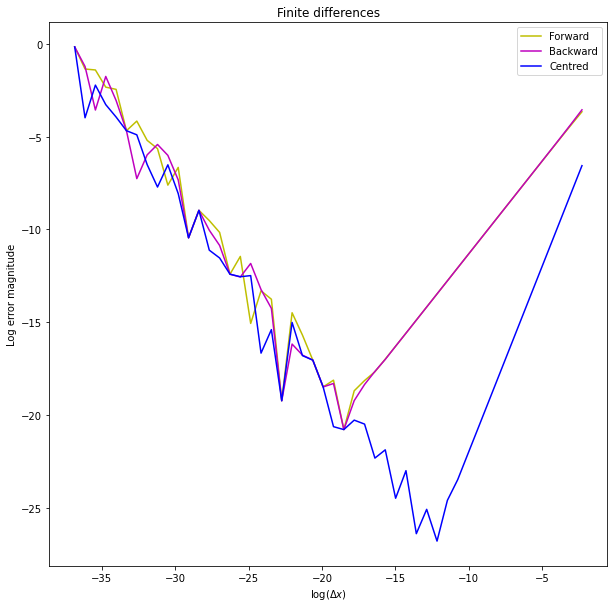

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def F_derivative(x):
    return -np.sin(x)

# Calculate the absolute error
F_derivative_error = np.abs(F_derivative_approx - F_derivative(x))
B_derivative_error = np.abs(B_derivative_approx - F_derivative(x))
C_derivative_error = np.abs(C_derivative_approx - F_derivative(x))
  
fig_1, ax_1 = plt.subplots(figsize= (10,10)) 
ax_1.plot(np.log(dx), np.log(F_derivative_error), "y-", label = 'Forward')
ax_1.plot(np.log(dx), np.log(B_derivative_error), "m-", label = 'Backward')
ax_1.plot(np.log(dx), np.log(C_derivative_error), "b-", label = 'Centred')
ax_1.legend()
ax_1.set(xlabel="$\log(\Delta x)$", ylabel="Log error magnitude", title="Finite differences")


plt.show()

**4.3**
Describe and interpret your results in no more than 250 words.

*Hint: run the code below.*

**[3 marks]**

Built into the forward, backward and centred techniques of evaluating derivatives
is that they are only finitely accurate. To begin with increasingly small
values of h, yield more accurate results, however once we go beyond the point
of the truncated Taylor series, the round off error begins to dominate and 
we begin to have increasingly less accurate values when evaluating our derivatives.

For the centred difference method, reading off the graph from the right, 
we see that it is far more effective than the backward or forward difference 
methods. Firstly this is because the Centred difference method converges 
fastest to its most accurate estimate. Secondly, because it has the lowest
error of all the approximation methods examined. 

Forward and Backward methods converge to a similar order of accuracy.
They also have a similar rate of convergence to their best estimate for 
evaluating the derivative. The disadvantage to these methods is they converge
more slowly and with far less accuracy than can be gained from centred approximation.


📝 ***Discussion for question 4.3***


